In [2]:
# Gerando modelo de Machine Learning (classificação)
# Domínio: Pessoas com Doença do Coração nos Estados Unidos.
# Aluno Werbm Luiz Tavares da Silva
# werbm.moreira@hotmail.com

In [2]:
#Conjunto de importacoes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [4]:
#Carrega o dataset com os dados para o treinamento e validacao
df_coracao_treino = pd.read_csv("heart.csv", encoding="utf-8")

In [5]:
df_coracao_treino.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# Verificando o formato dos dados
df_coracao_treino.shape

(303, 14)

In [7]:
#Definição dos atributos que deverao ser treinados para gerar o modelo de classificacao
data_treino = np.array(df_coracao_treino[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']])
#Definição do atributo de classificacao
data_classif = np.array(df_coracao_treino['target'])

In [9]:
# Verificando as primeiras linhas do dataset
df_coracao_treino.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [10]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(df_coracao_treino, size=35):
    corr = df_coracao_treino.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns) 

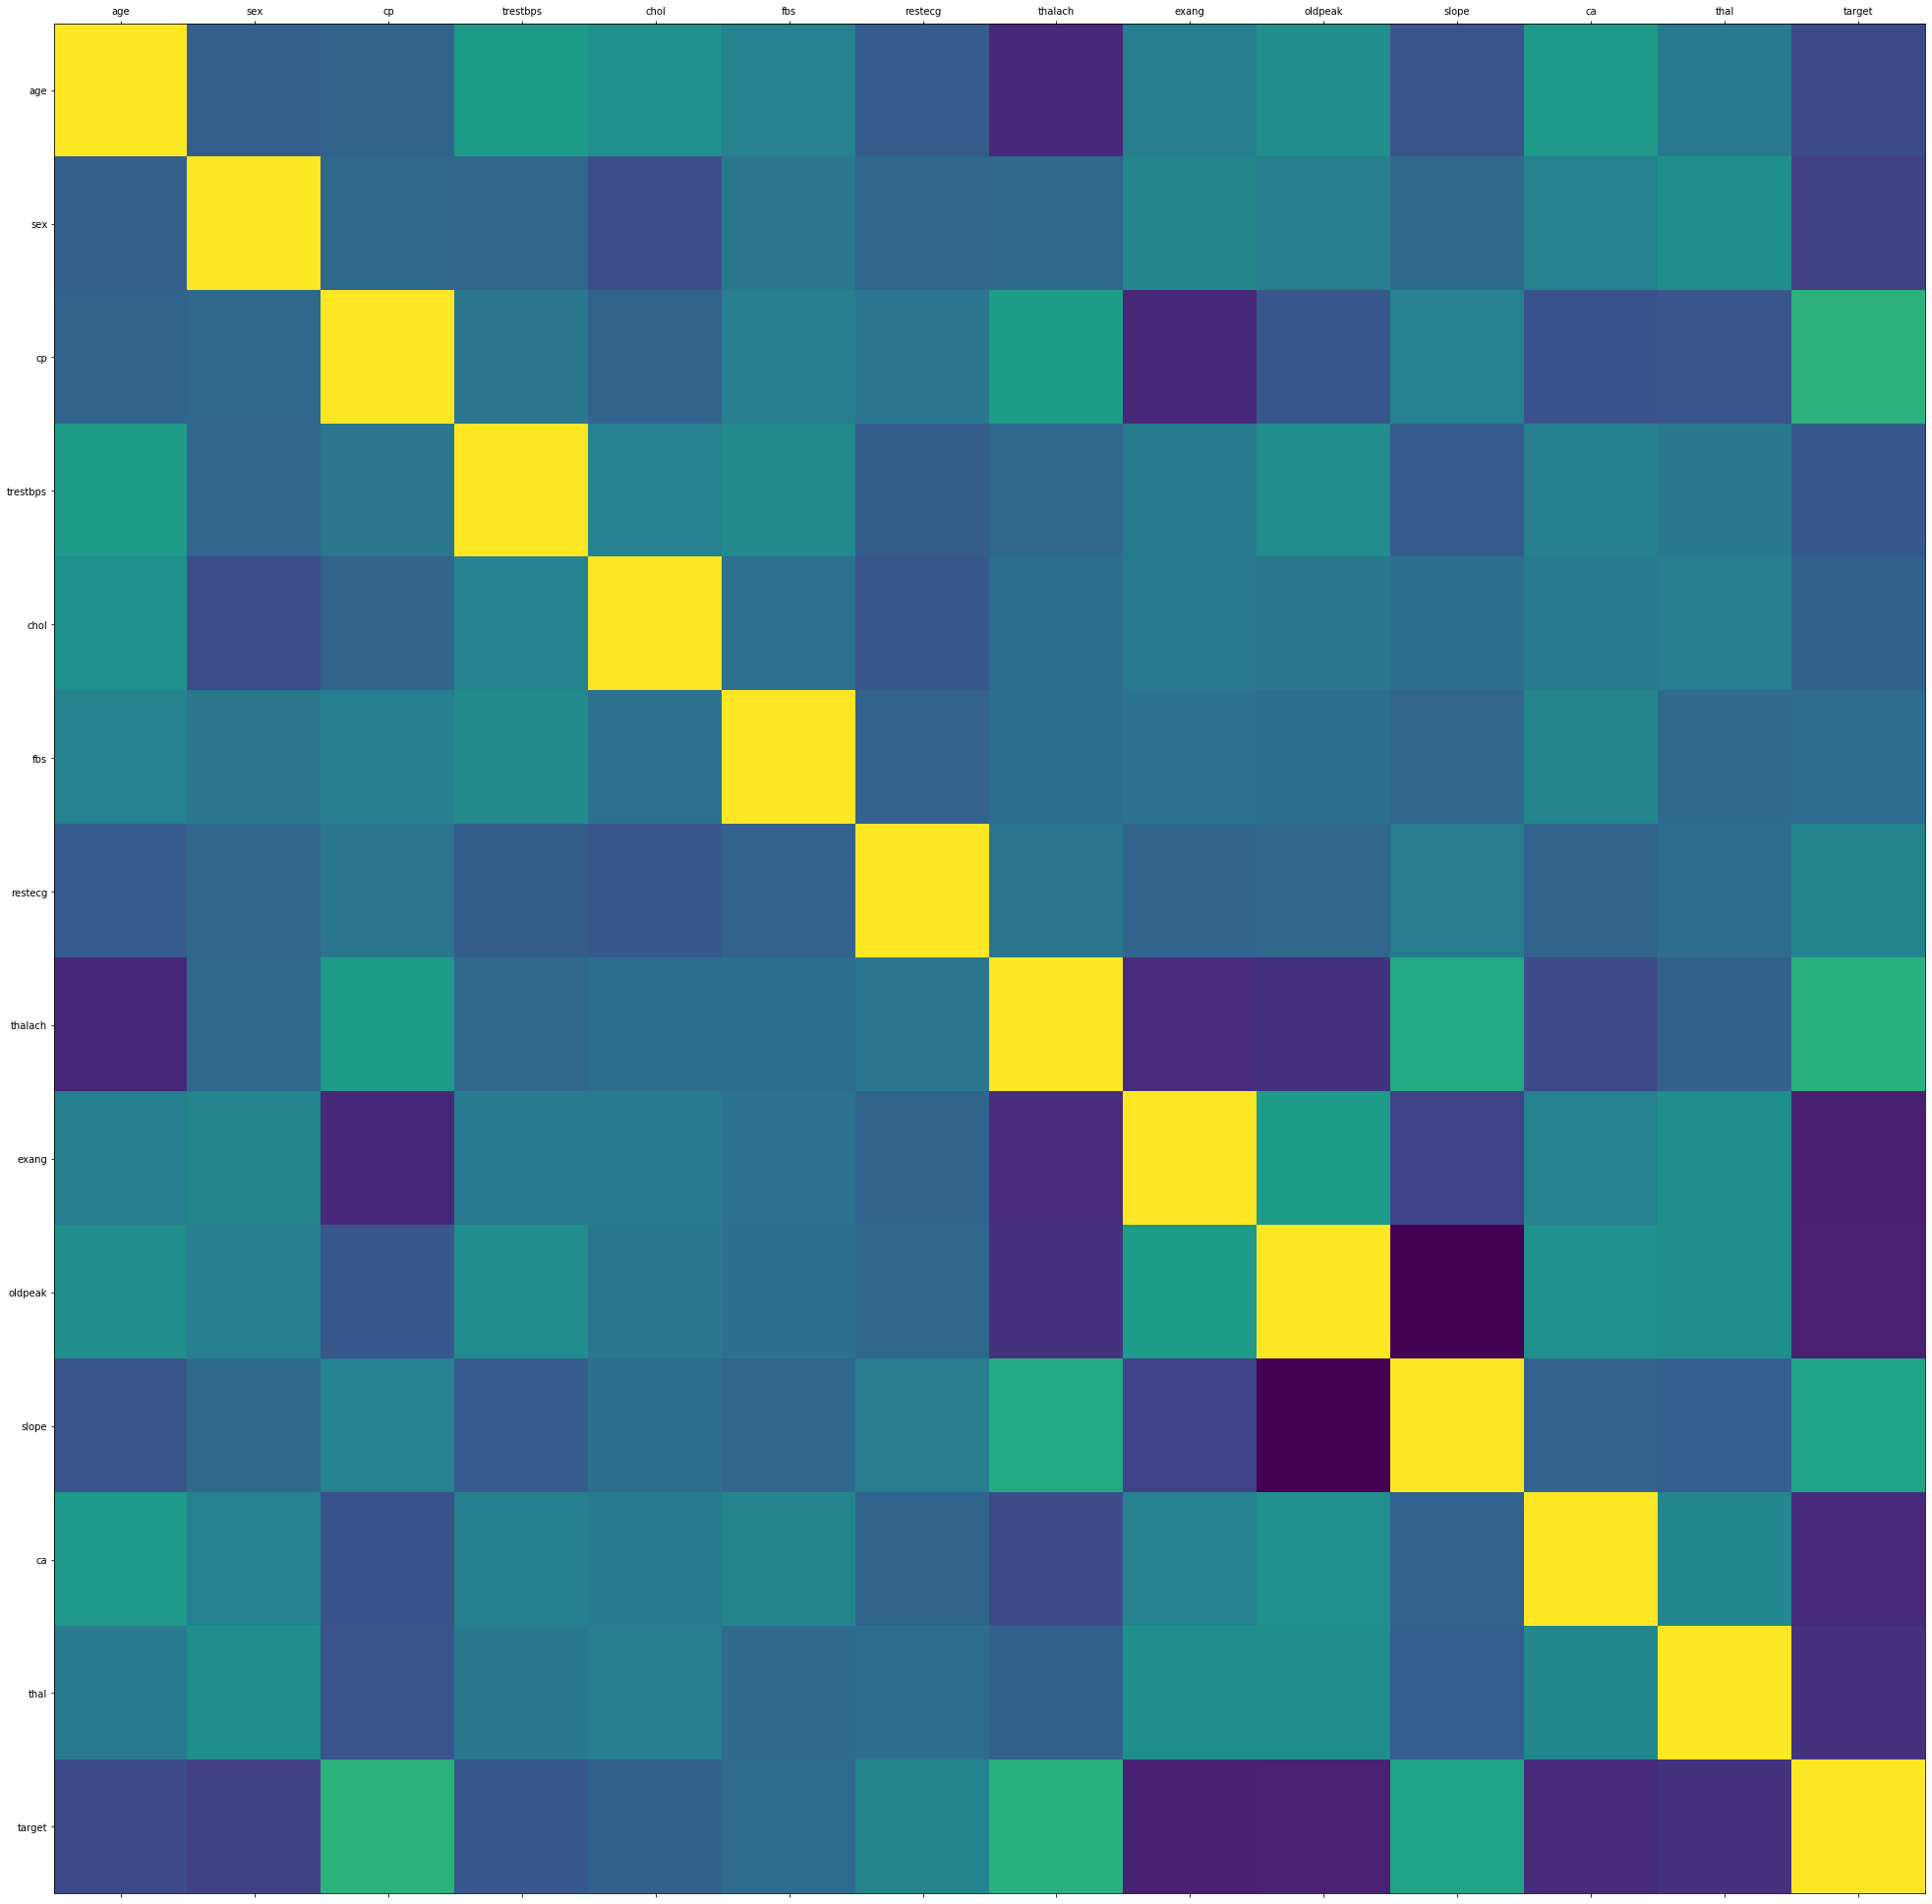

In [11]:
# Criando o gráfico - Matriz de Correlação..
plot_corr(df_coracao_treino)

In [12]:
# Spliting = 70% para dados de treino e 30% para dados de teste

In [14]:
#Definição dos conjuntos de treinamento e validação
x_treino, x_val, y_treino, y_val = train_test_split(data_treino, data_classif, test_size=0.30)

In [15]:
#Apresentacao dos dados selecionados para o conjunto de treinamento e validacao
print("-----------------------")
print("Conjunto de Treinamento")
print(x_treino)
print("Conjunto de Validacao")
print(x_val)
print("-----------------------")

-----------------------
Conjunto de Treinamento
[[55.  0.  0. ...  1.  0.  2.]
 [48.  1.  1. ...  0.  0.  3.]
 [44.  1.  2. ...  2.  0.  2.]
 ...
 [61.  0.  0. ...  1.  0.  3.]
 [65.  1.  0. ...  1.  1.  3.]
 [62.  0.  0. ...  1.  0.  2.]]
Conjunto de Validacao
[[70.  1.  0. ...  1.  3.  2.]
 [57.  1.  0. ...  1.  1.  1.]
 [58.  1.  1. ...  1.  4.  3.]
 ...
 [44.  1.  2. ...  2.  0.  2.]
 [64.  1.  0. ...  1.  2.  1.]
 [57.  1.  0. ...  1.  1.  3.]]
-----------------------


In [17]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(x_treino)/len(df_coracao_treino.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(x_val)/len(df_coracao_treino.index)) * 100))

69.97% nos dados de treino
30.03% nos dados de teste


In [18]:
# - Aplicando o Algoritmo com o Naive Bayes - GaussianNB.

In [19]:
#Treinamento do modelo com os dados atribuidos ao conjunto de treinamento
modelo_NB = GaussianNB()
modelo_NB.fit(x_treino, y_treino)

GaussianNB()

In [20]:
#Predição e acurácia para o conjunto de treinamento
print("Predicao para o conjunto de treinamento")
y_pred_treino = modelo_NB.predict(x_treino)
print("Acuracia para o conjunto de treinamento")
print(accuracy_score(y_treino, y_pred_treino))
print("Na Base de Treinamento")

Predicao para o conjunto de treinamento
Acuracia para o conjunto de treinamento
0.839622641509434
Na Base de Treinamento


In [21]:
#Predição e acurácia para o conjunto de validação
print("Predicao para o conjunto de validacao")
y_pred_val = modelo_NB.predict(x_val)
print("Acuracia para o conjunto de validacao")
print(accuracy_score(y_val, y_pred_val))
print("na Base de Teste")

Predicao para o conjunto de validacao
Acuracia para o conjunto de validacao
0.8351648351648352
na Base de Teste


In [22]:
from sklearn import metrics

In [24]:
# Criando uma Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_val, y_pred_val, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_val, y_pred_val, labels = [1, 0]))

Confusion Matrix
[[48  7]
 [ 8 28]]

Classification Report
              precision    recall  f1-score   support

           1       0.86      0.87      0.86        55
           0       0.80      0.78      0.79        36

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.83      0.84      0.83        91

